# Initial data teuk-fortran-2020

$$
\Psi_4 (r, \theta, \phi) = A \cdot B(r) \cdot Y_{\ell m}(\theta, \phi)
$$

where:

- $A$ is the **initial pulse amplitude**.
- $B(r)$ is the **radial bump function**, defined as:

$$
B(r) =
\begin{cases}
\left(\frac{r - r_l}{w} \right)^2 \left(\frac{r_u - r}{w} \right)^2 \exp\left(-\frac{1}{r - r_l}\right) \exp\left(-\frac{2}{r_u - r}\right), & \text{if } r_l < r < r_u \\
0, & \text{otherwise}
\end{cases}
$$

- $Y_{\ell m}(\theta, \phi)$ is the **spherical harmonic**, given by:

$$
Y_{\ell m}(\theta, \phi) = N_{\ell m} P_{\ell}^{m}(\cos\theta) e^{im\phi}
$$

where $N_{\ell m}$ is a normalization factor and $P_{\ell}^{m}$ are the **associated Legendre polynomials**.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

In [46]:
# Initial pulse parameters
A = 0.1 # Arbitrary amplitude
rl, ru = 1.1, 2.5  # Radial limits
w = ru - rl  # Pulse width
l, m, s = 2, 1, -2  # Spherical harmonic (spin = -2 but probably wouldn't work because we don't have definitions for spin-weighted speherical harmonics)

In [47]:
# Define the radial bump function
def bump_function(r, rl, ru, w):
    if rl < r < ru:
        return ((r - rl) / w) ** 2 * ((ru - r) / w) ** 2 * np.exp(-1 / (r - rl)) * np.exp(-2 / (ru - r))
    else:
        return 0.0

# Define the full pulse function
def initial_pulse(r, theta, phi):
    bump = bump_function(r, rl, ru, w)
    Ylm = sph_harm(m, l, phi, theta).real  # Spherical harmonic (real part) weird try
    return A * bump * Ylm

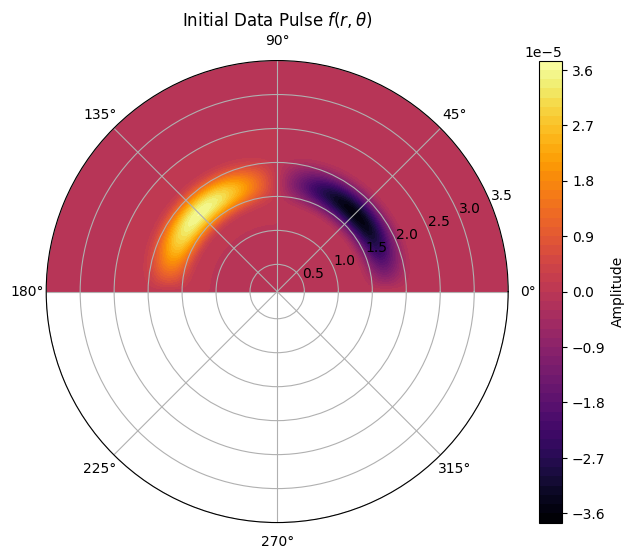

In [48]:
# Create a spherical coordinate mesh
r_values = np.linspace(rl - 1, ru + 1, 100)
theta_values = np.linspace(0, np.pi, 50)
R, Theta = np.meshgrid(r_values, theta_values)

# Evaluate the initial pulse on the mesh
Pulse = np.array([[initial_pulse(r, theta, 0) for r in r_values] for theta in theta_values])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
c = ax.contourf(Theta, R, Pulse, levels=50, cmap="inferno")
fig.colorbar(c, ax=ax, label="Amplitude")
ax.set_title("Initial Data Pulse $f(r, \\theta)$")
plt.show() 

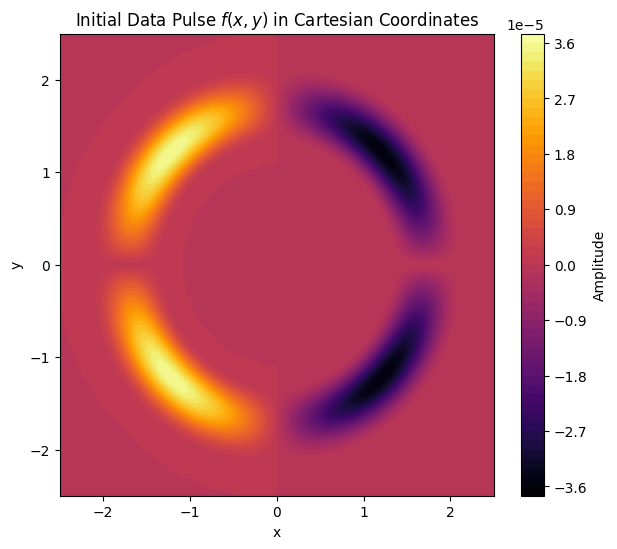

In [49]:
# Create a mesh in Cartesian coordinates
x_values = np.linspace(-ru, ru, 100)
y_values = np.linspace(-ru, ru, 100)
X, Y = np.meshgrid(x_values, y_values)

# Convert to polar coordinates
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

Pulse_cartesian = np.array([[initial_pulse(r, theta, 0) for r, theta in zip(row_r, row_theta)] for row_r, row_theta in zip(R, Theta)])

fig, ax = plt.subplots(figsize=(7, 6))
c = ax.contourf(X, Y, Pulse_cartesian, levels=50, cmap="inferno")
fig.colorbar(c, ax=ax, label="Amplitude")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Initial Data Pulse $f(x, y)$ in Cartesian Coordinates")
plt.show()

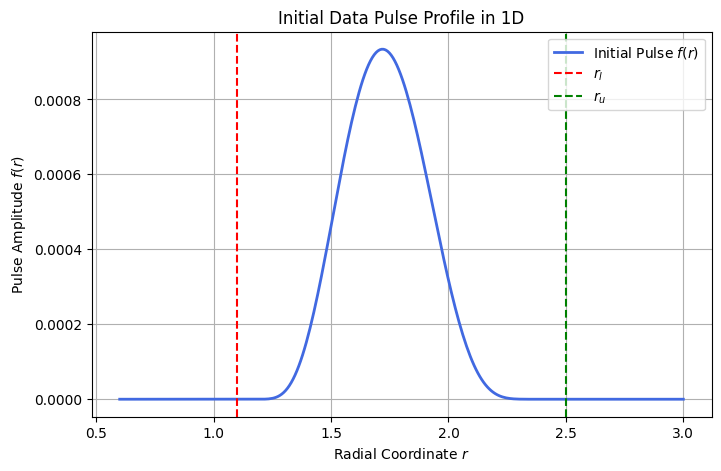

In [54]:
# Create a mesh of radial values to visualize the 1D profile
r_values_1d = np.linspace(rl - 0.5, ru + 0.5, 300)
pulse_1d = np.array([bump_function(r, rl, ru, w) for r in r_values_1d])

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(r_values_1d, pulse_1d, color="royalblue", linewidth=2, label="Initial Pulse $f(r)$")
ax.axvline(rl, color="red", linestyle="--", label="$r_l$")
ax.axvline(ru, color="green", linestyle="--", label="$r_u$")

ax.set_xlabel("Radial Coordinate $r$")
ax.set_ylabel("Pulse Amplitude $f(r)$")
ax.set_title("Initial Data Pulse Profile in 1D")
ax.legend()
ax.grid()
plt.show()
